In [1]:
import pandas as pd
import json
from datetime import date

In [2]:
file_json_full = 'ftp://atviriduomenys.nvsc.lt/COVID19.json'
json_data_full = pd.read_json(file_json_full)

In [3]:
json_data_full['Susirgimo data'] = pd.to_datetime(json_data_full['Susirgimo data']) #"Start of sickness" 
json_data_full['Atvejo patvirtinimo data'] = pd.to_datetime(json_data_full['Atvejo patvirtinimo data']) #"Positive test date"

display(json_data_full['Išeitis'].unique())

Condition1  = json_data_full['Išeitis']=='Gydomas'
Condition2  = json_data_full['Išeitis']=='Pasveiko'
Condition3  = json_data_full['Išeitis']=='Mirė'

json_data_full = json_data_full[Condition1 | Condition2 | Condition3]

print('last date: ', json_data_full['Atvejo patvirtinimo data'].max())
print('Total cases ', json_data_full['Išeitis'].count() )

y= json_data_full['Išeitis'].count()
x = 154550
print('Skirtumas nuo pateiktos oficialos statistikos 2021-01-06 datai ' , x-y)

array(['Mirė', 'Pasveiko', 'Kita', 'Gydomas', '', 'Nesirgo'], dtype=object)

last date:  2021-01-17 00:00:00
Total cases  166602
Skirtumas nuo pateiktos oficialos statistikos 2021-01-06 datai  -12052


In [4]:
#display(json_data_full.head(2))
#display(json_data_full.info())
completed = json_data_full[json_data_full['Išeitis']!='Gydomas']
display(completed['Išeitis'].value_counts(normalize = True)*100)

display(json_data_full['Išeitis'].value_counts())

Pasveiko    97.846396
Mirė         2.153604
Name: Išeitis, dtype: float64

Pasveiko    104316
Gydomas      59990
Mirė          2296
Name: Išeitis, dtype: int64

In [5]:
"""
display(json_data_full['Įvežtinis'].value_counts())
display(json_data_full['Šalis'].value_counts())
display(json_data_full['Išeitis'].value_counts())
display(json_data_full['Užsienietis'].value_counts())
display(json_data_full['Atvejo amžius'].value_counts())
display(json_data_full['Lytis'].value_counts())
display(json_data_full['Savivaldybė'].value_counts())
display(json_data_full['Ar hospitalizuotas'].value_counts())
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())
"""

"\ndisplay(json_data_full['Įvežtinis'].value_counts())\ndisplay(json_data_full['Šalis'].value_counts())\ndisplay(json_data_full['Išeitis'].value_counts())\ndisplay(json_data_full['Užsienietis'].value_counts())\ndisplay(json_data_full['Atvejo amžius'].value_counts())\ndisplay(json_data_full['Lytis'].value_counts())\ndisplay(json_data_full['Savivaldybė'].value_counts())\ndisplay(json_data_full['Ar hospitalizuotas'].value_counts())\ndisplay(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())\ndisplay(json_data_full['Turi lėtinių ligų'].value_counts())\n"

In [6]:
#gender
json_data_full['Lytis'].replace('mot.','Moteris', inplace  = True)
json_data_full['Lytis'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Lytis'].value_counts())

Moteris         93987
Vyras           72167
nėra duomenų      448
Name: Lytis, dtype: int64

In [7]:
json_data_full['Išeitis'].replace('','nėra duomenų', inplace  = True)
json_data_full['Išeitis'].replace('Kita','nėra duomenų', inplace  = True)
display(json_data_full['Išeitis'].value_counts())

Pasveiko    104316
Gydomas      59990
Mirė          2296
Name: Išeitis, dtype: int64

In [8]:
json_data_full['Atvejo amžius'].replace('','nėra duomenų', inplace  = True)
display(json_data_full['Atvejo amžius'].value_counts())

50-59           35160
40-49           29601
30-39           28060
60-69           22534
20-29           22438
70-79            8926
10-19            7753
80-89            6065
0-9              4372
90-99            1375
nėra duomenų      298
100-109            18
900-909             1
120-129             1
Name: Atvejo amžius, dtype: int64

In [9]:
json_data_full['Gydomas intensyvioje terapijoje'].replace('','Ne', inplace  = True)
json_data_full['Turi lėtinių ligų'].replace('','Ne', inplace  = True)
display(json_data_full['Gydomas intensyvioje terapijoje'].value_counts())
display(json_data_full['Turi lėtinių ligų'].value_counts())

Ne      166212
Taip       390
Name: Gydomas intensyvioje terapijoje, dtype: int64

Ne      146230
Taip     20372
Name: Turi lėtinių ligų, dtype: int64

In [10]:
display(json_data_full.head(2))
json_data_full = json_data_full[json_data_full['Išeitis'] != 'Nesirgo']

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,Ne,Ne


In [11]:
covid_grouped = json_data_full.groupby(['Atvejo patvirtinimo data', 'Išeitis']).agg({'Išeitis':'count'}).rename(columns={'Išeitis':'Total_Number'}).reset_index()
covid_table = covid_grouped.pivot_table(index=['Atvejo patvirtinimo data'], 
                    columns='Išeitis', 
                    values='Total_Number',
                    fill_value=0).reset_index(drop=False)


covid_table = covid_table[['Atvejo patvirtinimo data','Gydomas', 'Pasveiko','Mirė']]
covid_table['Total per day'] = covid_table['Gydomas']+covid_table['Pasveiko']+covid_table['Mirė']
covid_table['Running: currently sick'] = covid_table['Gydomas'].cumsum(skipna = True)
covid_table['Running: recovered'] = covid_table['Pasveiko'].cumsum(skipna = True)
covid_table['Running: died'] = covid_table['Mirė'].cumsum(skipna = True)
covid_table['Running: Total'] = covid_table['Running: currently sick']+covid_table['Running: recovered']+covid_table['Running: died']
covid_table['Running: Completed'] = covid_table['Running: recovered']+covid_table['Running: died']


display(covid_table.tail(10))


Išeitis,Atvejo patvirtinimo data,Gydomas,Pasveiko,Mirė,Total per day,Running: currently sick,Running: recovered,Running: died,Running: Total,Running: Completed
304,2021-01-08,1379,230,15,1624,50473,104112,2230,156815,106342
305,2021-01-09,1347,128,11,1486,51820,104240,2241,158301,106481
306,2021-01-10,738,20,12,770,52558,104260,2253,159071,106513
307,2021-01-11,874,17,12,903,53432,104277,2265,159974,106542
308,2021-01-12,1651,25,12,1688,55083,104302,2277,161662,106579
309,2021-01-13,1353,8,7,1368,56436,104310,2284,163030,106594
310,2021-01-14,1135,4,4,1143,57571,104314,2288,164173,106602
311,2021-01-15,1112,2,4,1118,58683,104316,2292,165291,106608
312,2021-01-16,834,0,1,835,59517,104316,2293,166126,106609
313,2021-01-17,473,0,3,476,59990,104316,2296,166602,106612


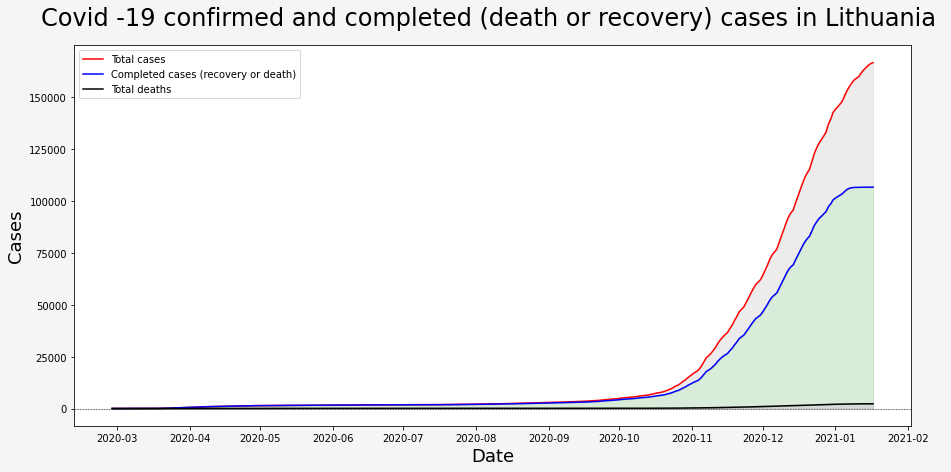

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Total'] , color = "red", label='Total cases')
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: Completed'], color = "blue", label = "Completed cases (recovery or death)")
ax.plot(covid_table['Atvejo patvirtinimo data'], covid_table['Running: died'], color = "Black", label='Total deaths')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Covid -19 confirmed and completed (death or recovery) cases in Lithuania " , fontsize=24, pad=20)

X = np.array(covid_table['Atvejo patvirtinimo data'])

Y1 = np.array(covid_table['Running: Total'])
Y2 = np.array(covid_table['Running: Completed'])
Y3 = np.array(covid_table['Running: died'])
ax.fill_between(X, Y1,Y2,color='grey',alpha=.15)
ax.fill_between(X, Y2,Y3,color='green',alpha=.15)
ax.fill_between(X, Y3,0,color='black',alpha=.15)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()

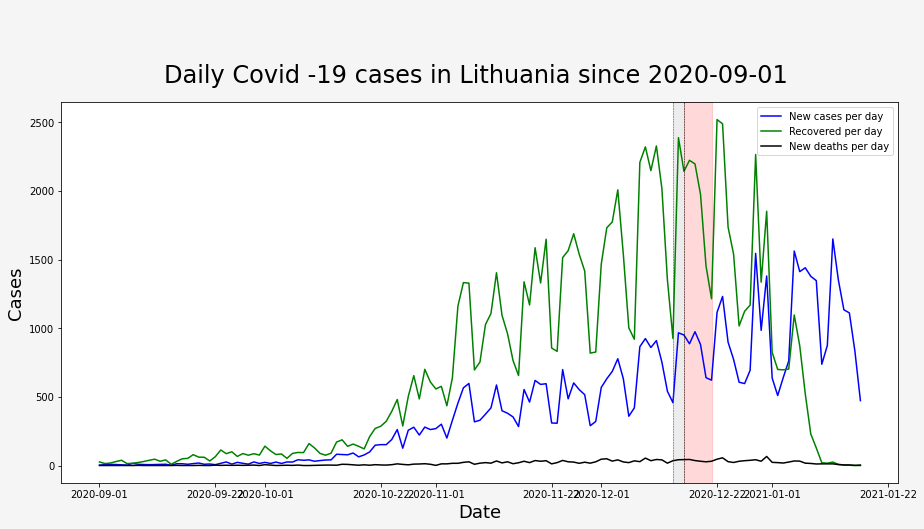

In [13]:
import matplotlib.pyplot as plt
import numpy as np

covid_table09 = covid_table[covid_table['Atvejo patvirtinimo data']>='2020-09-01']
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09["Gydomas"] , color = "blue", label='New cases per day')
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Pasveiko'], color = "green", label = "Recovered per day")
ax.plot(covid_table09['Atvejo patvirtinimo data'], covid_table09['Mirė'], color = "black", label='New deaths per day')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Daily Covid -19 cases in Lithuania since 2020-09-01 " , fontsize=24, pad=20)


plt.axvline(x = date(2020,12,14), color='red', linestyle='--', linewidth=0.5) #start of tightened quarantine
plt.axvline(x = date(2020,12,16), color='black', linestyle='--', linewidth=0.5) #start of tightened quarantine

ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.15, color='grey')
ax.axvspan(date(2020,12,16), date(2020,12,21), alpha=0.15, color='red')
ax.legend()

plt.annotate(' 2 days period before \n the start of tightened quarantine'
             ,xy = (date(2020,12,14),3000)
             ,xytext = (date(2020,11,15),3200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [14]:
mobility_csv_file = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
c_size = 5000

mobility_dataLT = None
for chunk in pd.read_csv(mobility_csv_file,chunksize=c_size, parse_dates=['date']):
    chunk_result =  chunk[chunk['country_region']=="Lithuania"]
    
    if mobility_dataLT is None:
        mobility_dataLT = chunk_result
    else:
        mobility_dataLT = mobility_dataLT.append(chunk_result)

print(mobility_dataLT.shape)


(19908, 14)


In [15]:
mobility_data_melted = pd.melt(mobility_dataLT, id_vars = ['country_region', 'sub_region_1', 'date'], 
                              value_vars = ['retail_and_recreation_percent_change_from_baseline',
                                            'grocery_and_pharmacy_percent_change_from_baseline',
                                            'parks_percent_change_from_baseline',
                                            'transit_stations_percent_change_from_baseline',
                                            'workplaces_percent_change_from_baseline',
                                            'residential_percent_change_from_baseline'])
display(mobility_data_melted.tail())


,country_region,sub_region_1,date,variable,value
119443,Lithuania,Vilnius County,2021-01-11,residential_percent_change_from_baseline,19.0
119444,Lithuania,Vilnius County,2021-01-12,residential_percent_change_from_baseline,19.0
119445,Lithuania,Vilnius County,2021-01-13,residential_percent_change_from_baseline,19.0
119446,Lithuania,Vilnius County,2021-01-14,residential_percent_change_from_baseline,20.0
119447,Lithuania,Vilnius County,2021-01-15,residential_percent_change_from_baseline,21.0


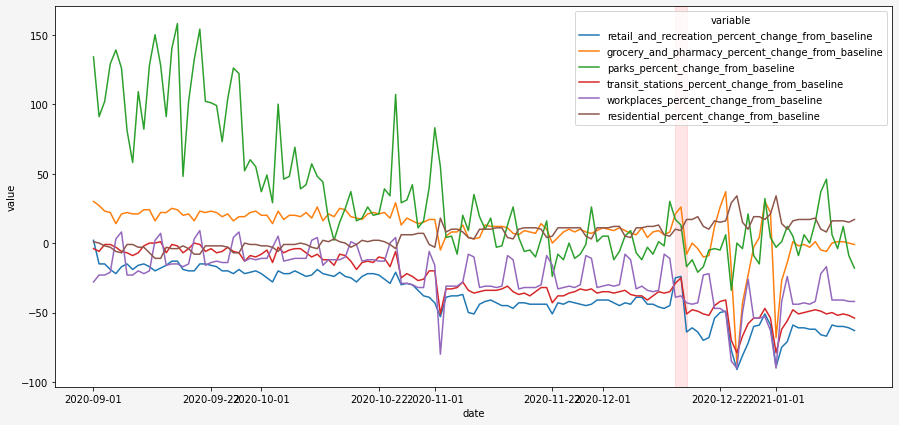

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

#Selected aggregated data of Lithuania
mobility_data_melted = mobility_data_melted[mobility_data_melted['sub_region_1'].isna()] 
#Selected aggregated data of Lithuania from '2020-09-01'
mobility_data_melted09 = mobility_data_melted[mobility_data_melted['date']>='2020-09-01']

sns.lineplot(x= 'date',y ='value', data = mobility_data_melted09, hue = 'variable' )
ax.axvspan(date(2020,12,14), date(2020,12,16), alpha=0.1, color='red')

In [17]:
json_data_full.columns

Index(['Susirgimo data', 'Atvejo patvirtinimo data', 'Įvežtinis', 'Šalis',
       'Išeitis', 'Užsienietis', 'Atvejo amžius', 'Lytis', 'Savivaldybė',
       'Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje',
       'Turi lėtinių ligų'],
      dtype='object')

Text(0, 0.5, '# of cases')

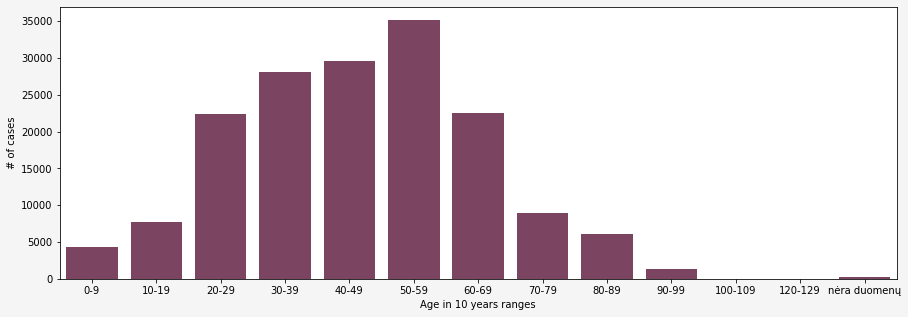

In [18]:
fig, ax = plt.subplots(figsize=(15,5),facecolor = "#F5F5F5")

order =  ['0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70-79', '80-89', '90-99', '100-109',  '120-129','nėra duomenų']
ax = sns.countplot(x='Atvejo amžius', data=json_data_full, order = order, color = "#843b62")
plt.xlabel('Age in 10 years ranges')
plt.ylabel('# of cases')

In [19]:
age_range = json_data_full['Atvejo amžius']
age_range.unique()
age_range_list = ['60-69', '40-49', '30-39', '50-59', '20-29', '10-19', '0-9',
       '70-79', '80-89', '90-99', '100-109', 'nėra duomenų', '120-129']
age_median = [64.5,44.5,34.5,54.5,24.5,14.5,4.5,74.5,84.5,94.5,104.5, np.NaN, 124.5]
new = zip(age_range_list,age_median)
new_values = pd.DataFrame(list(new))
new_values.columns = ["Atvejo amžius","age_median"]

json_data_full = pd.merge(json_data_full,new_values, on = "Atvejo amžius", how = "left"  )
json_data_full.tail()    

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų,age_median
166597,2021-01-14,2021-01-17,Ne,,Gydomas,Ne,30-39,Vyras,Kauno m.,Ne,Ne,Taip,34.5
166598,2021-01-17,2021-01-17,Ne,,Gydomas,Ne,70-79,Vyras,Radviliškio r.,Taip,Ne,Ne,74.5
166599,2021-01-15,2021-01-15,Ne,,Gydomas,Ne,20-29,Vyras,Šakių r.,Ne,Ne,Ne,24.5
166600,2021-01-13,2021-01-17,Ne,,Gydomas,Ne,50-59,Vyras,Varėnos r.,Ne,Ne,Ne,54.5
166601,2021-01-04,2021-01-08,Ne,,Pasveiko,Ne,60-69,Moteris,Ukmergės r.,Ne,Ne,Taip,64.5


In [20]:
np.random.seed(42)
age_median = json_data_full["age_median"]
age_jitter = age_median+np.random.uniform(-5, 5, size=len(age_median))

date = json_data_full['Atvejo patvirtinimo data']

-0.4969822298279256

126.136247207673

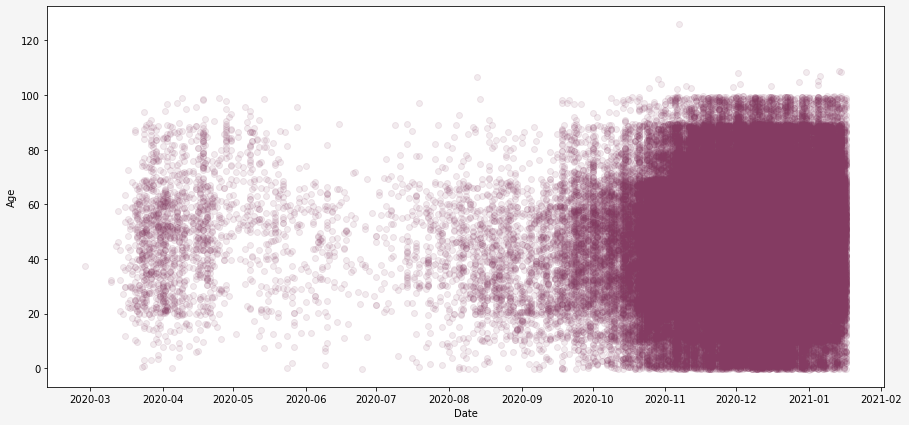

In [21]:
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")


display(age_jitter.min())
display(age_jitter.max())
# Make a scatter plot
plt.plot(date , age_jitter, 'o', alpha = 0.1, color = "#843b62")

plt.ylabel('Age')
plt.xlabel('Date')

plt.show()

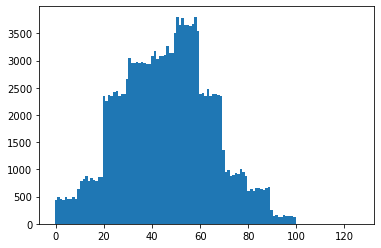

In [22]:
plt.hist(age_jitter, bins = 120)
plt.show()

,age_median
count,166303.000000
mean,45.977664
std,18.862092
min,4.500000
25%,34.500000
50%,44.500000
75%,54.500000
max,124.500000


<AxesSubplot:xlabel='age_median'>

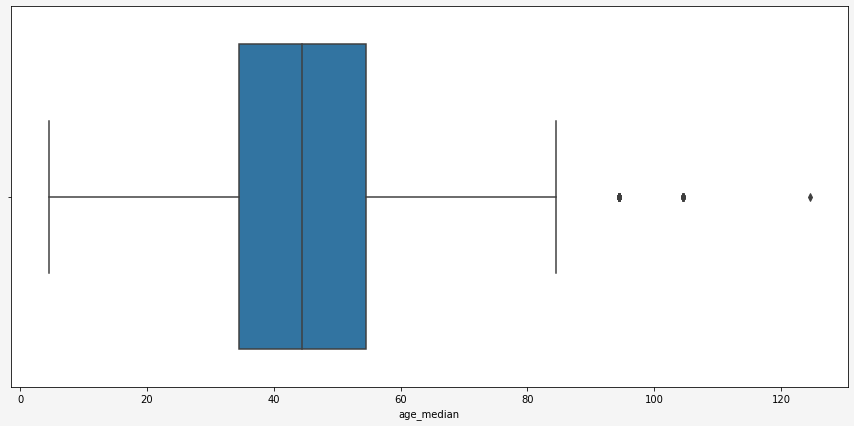

In [23]:
age_median = json_data_full.dropna(subset = ["age_median"])

display(age_median.describe())

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

sns.boxplot(x=json_data_full["age_median"])


In [24]:
Q1 = age_median["age_median"].quantile(0.25)
Q3 = age_median["age_median"].quantile(0.75)
IQR = Q3 - Q1
#print(IQR_tests)
Check_outliers = (age_median["age_median"] < (Q1 - 1.5 * IQR)) |(age_median["age_median"] > (Q3 + 1.5 * IQR))
Outliers_agerange = age_median[Check_outliers]['age_median'].unique()
Outliers_agerange_list = list(Outliers_agerange)
display(Outliers_agerange_list)
age_median_without_outliear = age_median[~age_median["age_median"].isin(Outliers_agerange_list)]

[94.5, 104.5, 124.5]

In [25]:
def decorate_cdf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Age')
    plt.ylabel('CDF')
    plt.title(title)

count    164909.000000
mean         45.566224
std          18.400391
min           4.500000
25%          34.500000
50%          44.500000
75%          54.500000
max          84.500000
Name: age_median, dtype: float64

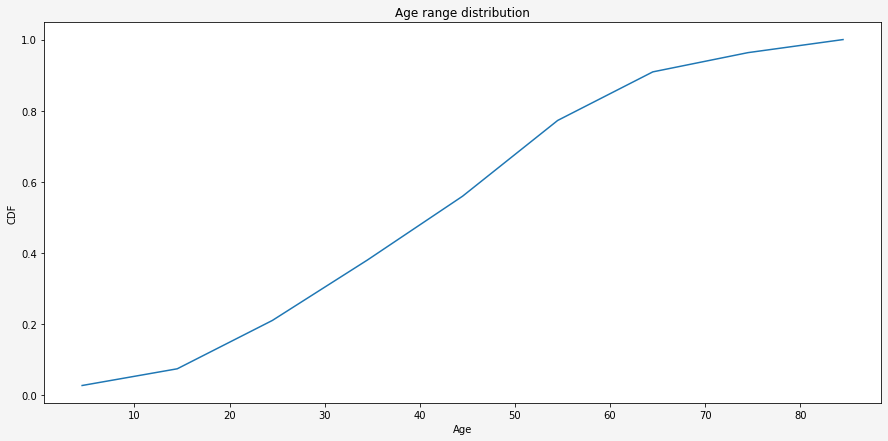

In [26]:
from empiricaldist import Pmf
from empiricaldist import Cdf

age_median_col = age_median_without_outliear["age_median"]

display(age_median_col.describe())

ageCdf = Cdf.from_seq(age_median_col, normalize=True)

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")
ageCdf.plot()
decorate_cdf('Age range distribution')


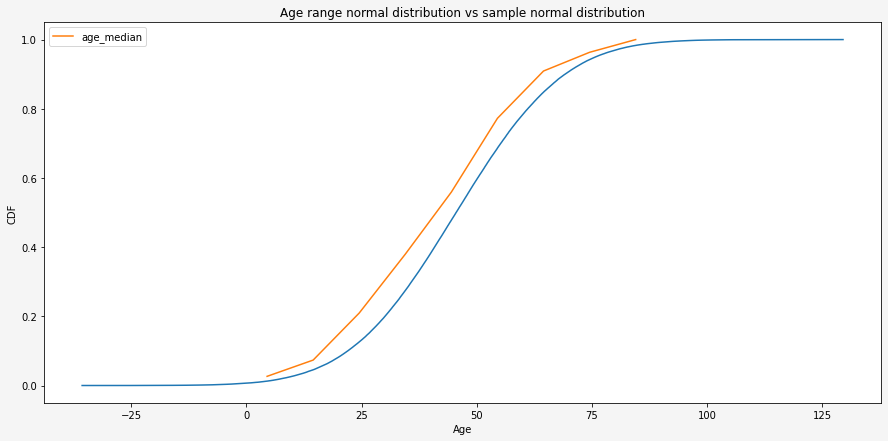

In [27]:
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")
mean =  age_median_col.mean()  
std =   age_median_col.std() 
cdf1 = Cdf.from_seq(np.random.normal( mean,std,size=len(age_median_col)))
cdf1.plot()

ageCdf = Cdf.from_seq(age_median_col, normalize=True)
ageCdf.plot()

plt.legend()
decorate_cdf('Age range normal distribution vs sample normal distribution')

In [28]:
display(mean)
display(std)

45.56622440254929

18.400391070831475

In [29]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

data = age_median_col
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)


c:\users\kęstas\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
data = age_median_col
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.7f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2711.627, p=0.0000000
Sample does not look Gaussian (reject H0)


In [31]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
data = age_median_col
# normality test
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2143.688
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [32]:
from scipy import stats

k2, p = stats.normaltest(data)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [33]:
Gender ={'Vyras': 1, 'Moteris' : 0}
json_data_full['Gender']= json_data_full['Lytis'].map(Gender)

json_data_full["Savivaldybė"] = json_data_full["Savivaldybė"].astype('category')
json_data_full["district_cat"] = json_data_full["Savivaldybė"].cat.codes

json_data_full["Išeitis"] = json_data_full["Išeitis"].astype('category')
json_data_full["outcome_cat"] = json_data_full["Išeitis"].cat.codes

json_data_full["Ar hospitalizuotas"] = json_data_full["Ar hospitalizuotas"].astype('category')
json_data_full["hosp_cat"] = json_data_full["Ar hospitalizuotas"].cat.codes

json_data_full["Gydomas intensyvioje terapijoje"] = json_data_full["Gydomas intensyvioje terapijoje"].astype('category')
json_data_full["reanim_cat"] = json_data_full["Gydomas intensyvioje terapijoje"].cat.codes

json_data_full["Turi lėtinių ligų"] = json_data_full["Turi lėtinių ligų"].astype('category')
json_data_full["other_illness_cat"] = json_data_full["Turi lėtinių ligų"].cat.codes

json_data_full.head()

,Susirgimo data,Atvejo patvirtinimo data,Įvežtinis,Šalis,Išeitis,Užsienietis,Atvejo amžius,Lytis,Savivaldybė,Ar hospitalizuotas,Gydomas intensyvioje terapijoje,Turi lėtinių ligų,age_median,Gender,district_cat,outcome_cat,hosp_cat,reanim_cat,other_illness_cat
0,2020-03-04,2020-03-16,Taip,Pietų Afrikos Respublika,Mirė,Ne,60-69,Vyras,Panevėžio r.,Taip,Taip,Taip,64.5,1.0,34,1,1,1,1
1,2020-03-13,2020-03-22,Taip,Austrijos Respublika,Pasveiko,Ne,40-49,Vyras,Švenčionių r.,Taip,Ne,Ne,44.5,1.0,61,2,1,0,0
2,2020-03-16,2020-03-22,Ne,,Pasveiko,Ne,60-69,Vyras,Vilniaus m.,Taip,Ne,Ne,64.5,1.0,50,2,1,0,0
3,2020-03-16,2020-03-19,Taip,Šveicarijos Konfederacija,Pasveiko,Ne,30-39,Vyras,Vilniaus r.,Taip,Ne,Ne,34.5,1.0,51,2,1,0,0
4,2020-03-11,2020-03-21,Ne,,Pasveiko,Ne,50-59,Moteris,Vilniaus m.,Taip,Ne,Ne,54.5,0.0,50,2,1,0,0


In [34]:
json_data_full.corr()

,age_median,Gender,district_cat,outcome_cat,hosp_cat,reanim_cat,other_illness_cat
age_median,1.000000,-0.090106,-0.023915,-0.073703,0.289403,0.053937,0.276834
Gender,-0.090106,1.000000,0.000671,-0.018551,0.011096,0.009687,-0.023557
district_cat,-0.023915,0.000671,1.000000,0.016164,-0.010093,0.007394,-0.045996
outcome_cat,-0.073703,-0.018551,0.016164,1.000000,-0.103052,-0.025413,-0.051687
hosp_cat,0.289403,0.011096,-0.010093,-0.103052,1.000000,0.175752,0.176562
reanim_cat,0.053937,0.009687,0.007394,-0.025413,0.175752,1.000000,0.060778
other_illness_cat,0.276834,-0.023557,-0.045996,-0.051687,0.176562,0.060778,1.000000


LinregressResult(slope=0.003595141246287277, intercept=-0.10699297958053111, rvalue=0.28940278544493236, pvalue=0.0, stderr=2.915894944485615e-05)

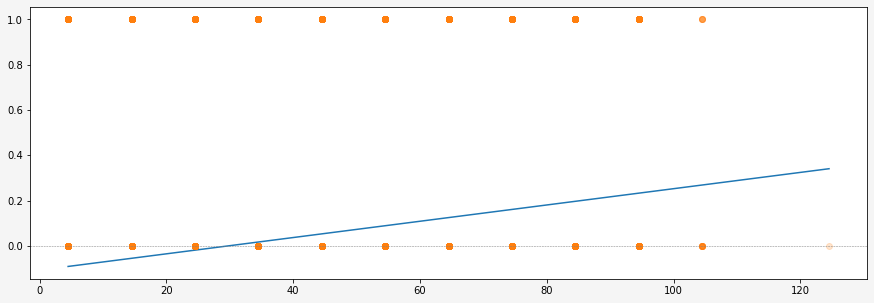

In [35]:

from scipy.stats import linregress
fig, ax = plt.subplots(figsize=(15,5),facecolor = "#F5F5F5")
subset = json_data_full.dropna(subset=['age_median', 'hosp_cat'])
xs = subset['age_median']
ys = subset['hosp_cat']

# Compute the linear regression
res = linregress(xs,ys)
display(res)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

plt.plot(xs, ys, 'o',  alpha=0.2)

plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)

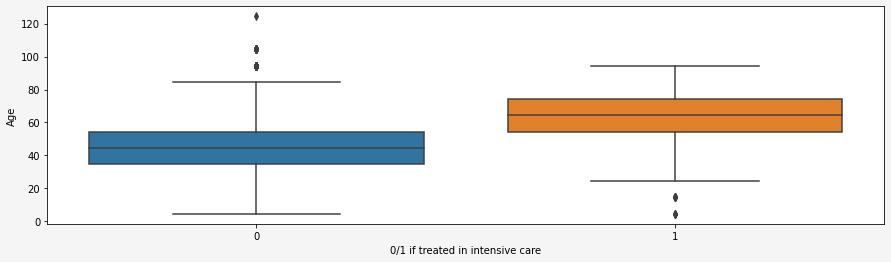

In [36]:
fig, ax = plt.subplots(figsize=(15,4),facecolor = "#F5F5F5")
y = json_data_full["age_median"]
x = json_data_full['reanim_cat']

sns.boxplot(x=x, y = y)
plt.ylabel('Age')
plt.xlabel('0/1 if treated in intensive care')

plt.show()

In [37]:
json_data_full[['Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje']].drop_duplicates()

,Ar hospitalizuotas,Gydomas intensyvioje terapijoje
0,Taip,Taip
1,Taip,Ne
7,Ne,Ne
9359,Ne,Taip


In [38]:
test = json_data_full[['Ar hospitalizuotas', 'Gydomas intensyvioje terapijoje']]
test1 = test['Ar hospitalizuotas']=='Ne'
test2 = test['Gydomas intensyvioje terapijoje']=='Taip'
test[test1 & test2]

,Ar hospitalizuotas,Gydomas intensyvioje terapijoje
9359,Ne,Taip
15289,Ne,Taip
19558,Ne,Taip
21532,Ne,Taip
23071,Ne,Taip
23950,Ne,Taip
26054,Ne,Taip
54634,Ne,Taip
73434,Ne,Taip
74660,Ne,Taip


In [39]:
import statsmodels.formula.api as smf

results = smf.logit('reanim_cat ~ age_median + C(Gender)', data = json_data_full).fit()
print(results.params)

Optimization terminated successfully.
         Current function value: 0.014960
         Iterations 11
Intercept          -10.025178
C(Gender)[T.1.0]     0.655531
age_median           0.064345
dtype: float64


In [40]:
np.random.seed(42)
rand_poisson = np.random.poisson(mean, size = len(data))

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(rand_poisson)

In [42]:
age_median_col

mapping = dict(ageCdf)
CDF = age_median_col.map(mapping)
CDF_df = pd.concat([age_median_col,CDF], axis = 'columns')
CDF_df.columns = ['median age', 'cdf']
CDF_df=CDF_df.sort_values(by = ['median age'])
CDF_df

,median age,cdf
66982,4.5,0.026512
57810,4.5,0.026512
146593,4.5,0.026512
57805,4.5,0.026512
57788,4.5,0.026512
...,...,...
135809,84.5,1.000000
100313,84.5,1.000000
162391,84.5,1.000000
140319,84.5,1.000000


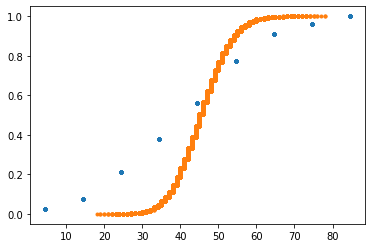

In [43]:
ageCdf = Cdf.from_seq(age_median_col, normalize=True)
plt.plot(CDF_df['median age'], CDF_df['cdf'], marker = ".", linestyle = 'none')

plt.plot(ecdf.x, ecdf.y, marker = ".", linestyle = 'none')
plt.show()

In [44]:
Condision1 = json_data_full['Išeitis']=='Mirė'
Condision2 = json_data_full['Išeitis']=='Pasveiko'


completed = json_data_full[Condision1 | Condision2].dropna()
inProgress = json_data_full[json_data_full['Išeitis']=='Gydomas']

completed['Išeitis'].unique()

['Mirė', 'Pasveiko']
Categories (2, object): ['Mirė', 'Pasveiko']

c:\users\kęstas\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


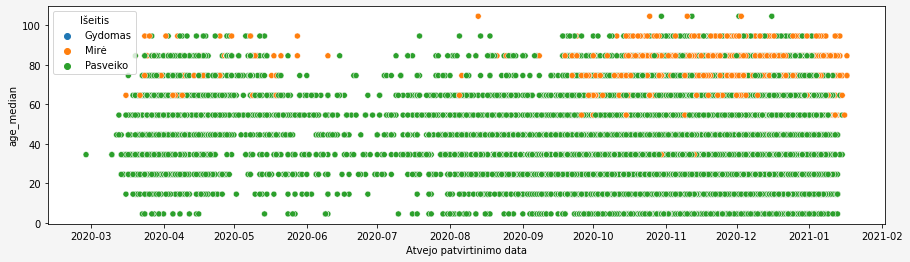

In [45]:
fig, ax = plt.subplots(figsize=(15,4),facecolor = "#F5F5F5")
g = sns.scatterplot(x='Atvejo patvirtinimo data',y='age_median',data = completed, hue = 'Išeitis')


<AxesSubplot:xlabel='Atvejo patvirtinimo data', ylabel='age_median'>

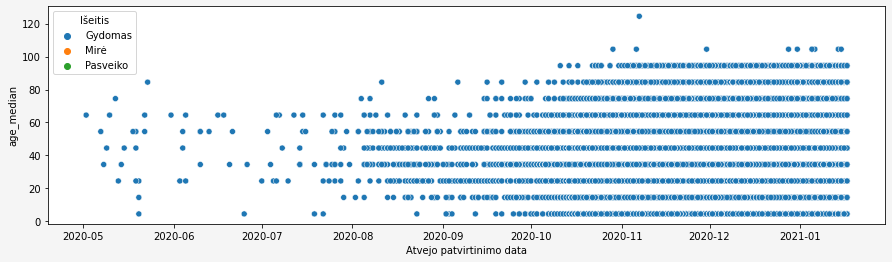

In [46]:
fig, ax = plt.subplots(figsize=(15,4),facecolor = "#F5F5F5")
sns.scatterplot(x='Atvejo patvirtinimo data',y='age_median',data = inProgress, hue = 'Išeitis')

Text(0, 0.5, '# of cases that ended as death')

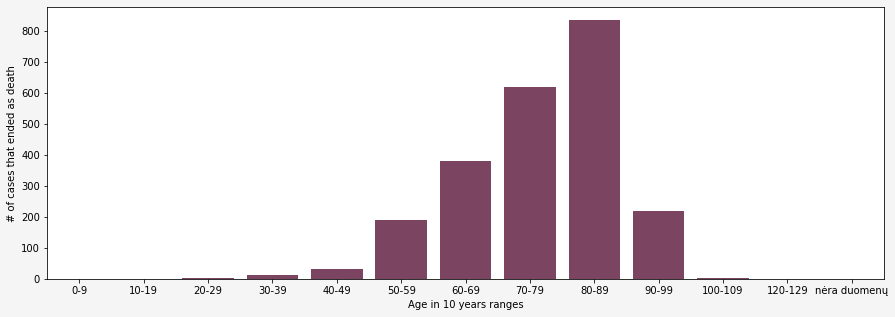

In [47]:
died = json_data_full[Condision1]

fig, ax = plt.subplots(figsize=(15,5),facecolor = "#F5F5F5")

order =  ['0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70-79', '80-89', '90-99', '100-109',  '120-129','nėra duomenų']
ax = sns.countplot(x='Atvejo amžius', data=died, order = order, color = "#843b62")
plt.xlabel('Age in 10 years ranges')
plt.ylabel('# of cases that ended as death')

0.6194417279918036

0.020590984601167695

Išeitis,Gydomas,Mirė,Pasveiko
Išeitis,,,
Gydomas,1.000000,0.781007,0.721463
Mirė,0.781007,1.000000,0.943412
Pasveiko,0.721463,0.943412,1.000000


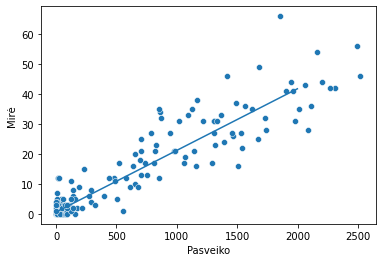

In [48]:
test = json_data_full.groupby(['Atvejo patvirtinimo data','Išeitis']).count()['Susirgimo data'].reset_index()
test.columns = ['Atvejo patvirtinimo data','Išeitis','total']

test_table = pd.pivot_table(test, values='total', index=['Atvejo patvirtinimo data'],
                    columns=['Išeitis'],fill_value=0)
sns.scatterplot(y = 'Mirė', x ='Pasveiko', data = test_table )

slope, intercept = np.polyfit(test_table['Pasveiko'],test_table['Mirė'], 1)
x_array = np.arange(2000)
y = intercept+ slope*x_array
plt.plot(x_array, y)
display(intercept)
display(slope)
display(test_table.corr())

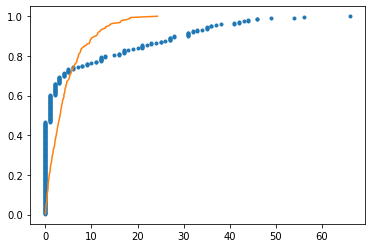

In [49]:
ecdf = ECDF(test_table['Mirė'])
ecdf_exp = ECDF(np.random.exponential(4.5, size = len(test_table['Mirė'])))
plt.plot(ecdf.x, ecdf.y, marker = ".", linestyle = 'none')
plt.plot(ecdf_exp.x, ecdf_exp.y)
plt.show()